### Is the density function of distributions from the one-parameter Exponential family always convex?

#### Answer: 
##### No. 
##### We will explain the answer by providing an CounterExample.

#### Using the Sympay Library in Python, we define the density function of the Poisson distribution as a one-parameter distribution of the exponential family, then we obtain the second derivative of the density function of this distribution, and if this density function is a convex function, it must always be in The support of the variable should be greater than zero, which we show is not the case

In [48]:
## load library
import sympy
from sympy import symbols, sqrt, Rational, exp, diff, factorial, lambdify

# define parameters and variable as symbols 
la, x = symbols('lambda x') 

## define density function of poisson distribution
expr =  exp(-la) * la ** x / factorial(x)
expr




lambda**x*exp(-lambda)/factorial(x)

In [49]:
## Get second driveative of density function 
df2 = diff(expr, x, 2)
df2

lambda**x*(-(polygamma(0, x + 1)**2 + polygamma(1, x + 1) - 2*gamma(x + 1)*polygamma(0, x + 1)**2/factorial(x))*gamma(x + 1)/factorial(x) + log(lambda)**2 - 2*log(lambda)*gamma(x + 1)*polygamma(0, x + 1)/factorial(x))*exp(-lambda)/factorial(x)

In [50]:
## convert expression to a function 
f = lambdify([la, x], df2)
## Here we create a Poisson distribution with mean 1 from the above function by assigning the second derivative to our mean
def fl(x):
    return f(1, x)

### Here we plot the second derivative of a Poisson distribution with mean 1.

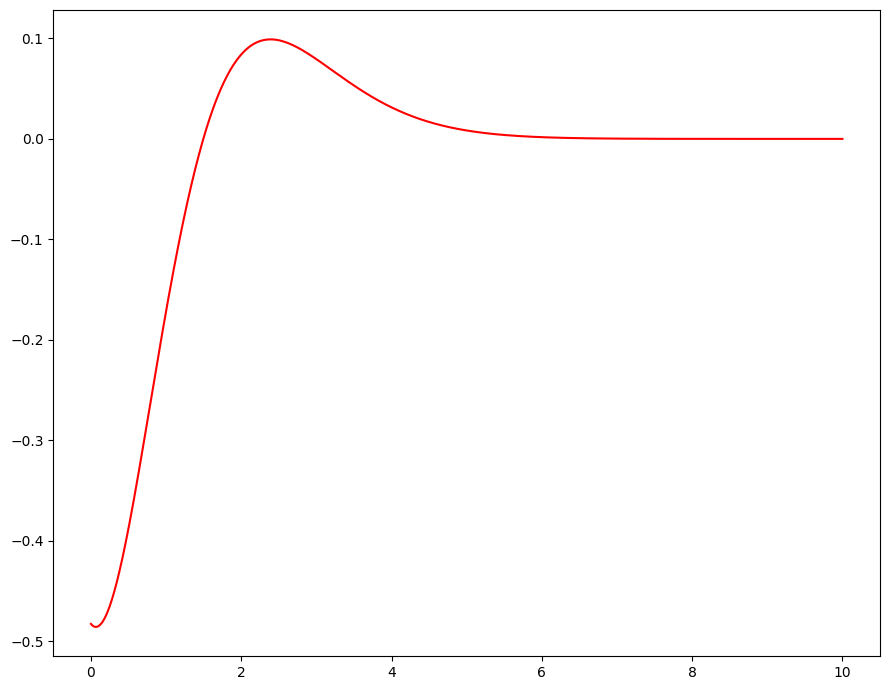

In [47]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [9, 7]
plt.rcParams["figure.autolayout"] = True


x = np.linspace(0, 10, 1000)

plt.plot(x, fl(x), color='red')

plt.show()